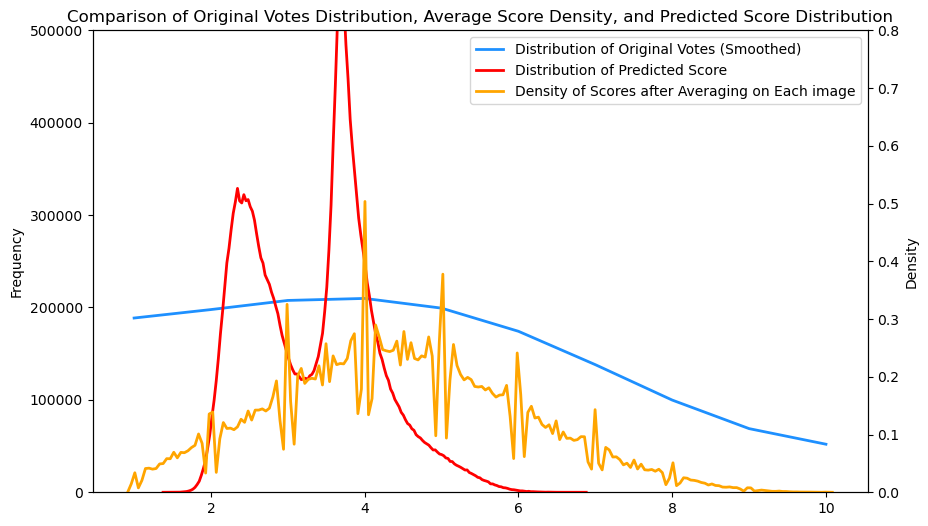

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from scipy.ndimage import gaussian_filter1d


file_path_1 = '/home/ubuntu/landscape-aesthetics/data/external/scenicornot/votes.tsv'
directory_path = Path('/home/ubuntu/landscape-aesthetics/data/processed/landscape_score')

# read data of votes 
df_votes = pd.read_csv(file_path_1, sep='\t')
df_votes['Votes'] = df_votes['Votes'].str.split(',')
df_votes = df_votes.explode('Votes')
df_votes['Votes'] = df_votes['Votes'].astype(int)
vote_counts = df_votes['Votes'].value_counts().sort_index()  
average_data = df_votes['Average']  

# Gaussian smoothing of votes data
vote_counts_smoothed = gaussian_filter1d(vote_counts.values, sigma=1.5)

# read data of predicted_score 
scores = []
for file in glob.glob(str(directory_path / "*.csv")):
    df = pd.read_csv(file)
    if 'predicted_score' in df.columns:
        scores.extend(df['predicted_score'].dropna().tolist()) 
scores_df = pd.DataFrame(scores, columns=['predicted_score'])

# Start drawing a chart
plt.figure(figsize=(10, 6))

# Primary axis: Plot the frequency distribution of Vote Counts
ax1 = plt.gca()
ax1.plot(vote_counts.index, vote_counts_smoothed, color="#1E90FF", label="Distribution of Original Votes (Smoothed)", linewidth=2)
ax1.set_ylabel('Frequency', color="black")  
ax1.tick_params(axis='y', labelcolor="black", color="black")  
ax1.set_ylim(0, 500000)  

# Secondary axis: Plot Predicted Score Density and Average Score Density
ax2 = ax1.twinx()
sns.kdeplot(scores_df['predicted_score'], color="red", label="Distribution of Predicted Score", ax=ax2, bw_adjust=0.1, linewidth=2)
sns.kdeplot(average_data, color="orange", label="Density of Scores after Averaging on Each image", ax=ax2, bw_adjust=0.3, linewidth=2)

# y
ax2.set_ylim(0, 0.8)  # 设置为合适的密度范围，与单独的图对齐
ax2.set_ylabel('Density', color="black")  # 设置次 y 轴标签颜色为黑色
ax2.tick_params(axis='y', labelcolor="black", color="black")  # 设置次 y 轴刻度标签和刻度线为黑色

# x
plt.xlabel('Score')
plt.title('Comparison of Original Votes Distribution, Average Score Density, and Predicted Score Distribution')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.show()


/tmp/ipykernel_653007/603194584.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(average_data, shade=True, color="#FF6347", bw_adjust=0.3, label="Average Score Density", ax=ax2)


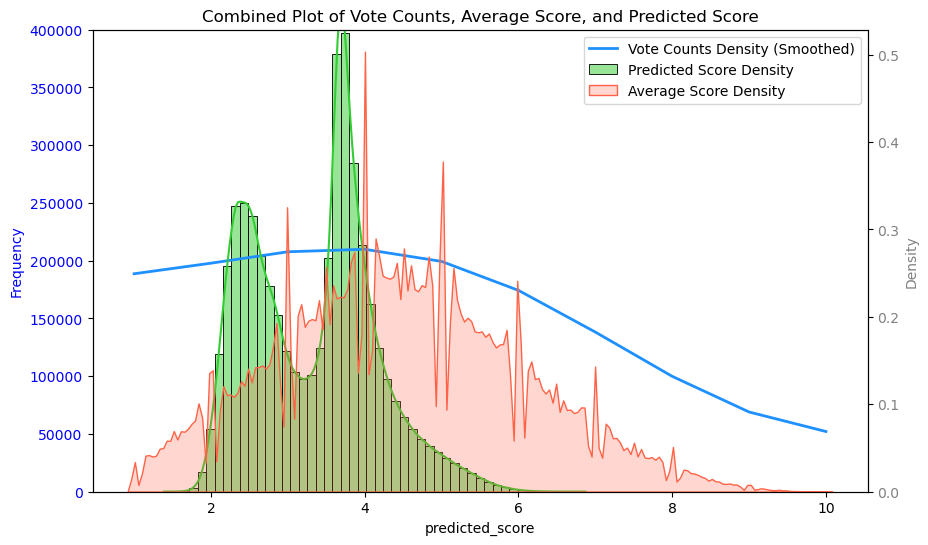

In [1]:
#other version
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from scipy.ndimage import gaussian_filter1d

file_path_1 = '/home/ubuntu/landscape-aesthetics/data/external/scenicornot/votes.tsv'
directory_path = Path('/home/ubuntu/landscape-aesthetics/data/processed/landscape_score')


df_votes = pd.read_csv(file_path_1, sep='\t')
df_votes['Votes'] = df_votes['Votes'].str.split(',')
df_votes = df_votes.explode('Votes')
df_votes['Votes'] = df_votes['Votes'].astype(int)
vote_counts = df_votes['Votes'].value_counts().sort_index()  # 统计频率
average_data = df_votes['Average']  # 假设 'Average' 列已存在于该文件中

vote_counts_smoothed = gaussian_filter1d(vote_counts.values, sigma=1.5)

scores = []
for file in glob.glob(str(directory_path / "*.csv")):
    df = pd.read_csv(file)
    if 'predicted_score' in df.columns:
        scores.extend(df['predicted_score'].dropna().tolist())  
scores_df = pd.DataFrame(scores, columns=['predicted_score'])

plt.figure(figsize=(10, 6))


ax1 = plt.gca()
ax1.plot(vote_counts.index, vote_counts_smoothed, color="#1E90FF", label="Vote Counts Density (Smoothed)", linewidth=2)
ax1.set_ylabel('Frequency', color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_ylim(0, 400000)  

sns.histplot(scores_df['predicted_score'], bins=50, kde=True, color="#32CD32", label="Predicted Score Density", ax=ax1)
# Note: histplot automatically detects peaks in data for KDE when kde=True

ax2 = ax1.twinx()
sns.kdeplot(average_data, shade=True, color="#FF6347", bw_adjust=0.3, label="Average Score Density", ax=ax2)
ax2.set_ylabel('Density', color="gray")
ax2.tick_params(axis='y', labelcolor="gray")

plt.xlabel('Score')
plt.title('Combined Plot of Vote Counts, Average Score, and Predicted Score')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')


plt.show()
